In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
ckd_df = pd.read_csv(r"E:\BSC TOPUP\Final Project\Dataset\kidney_disease.csv")

In [3]:
# Data Overview
print("CKD Data Overview:")
print(ckd_df.info())

CKD Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              

In [4]:
print(ckd_df.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [5]:
ckd_df.describe

<bound method NDFrame.describe of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes 

In [6]:
ckd_df.shape

(400, 26)

In [7]:
print(ckd_df.isnull().sum())

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [8]:
for col in ckd_df.columns:
    if ckd_df[col].isnull().any()==True:
        print(ckd_df[col].value_counts())

age
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: count, Length: 76, dtype: int64
bp
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64
sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64
al
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64
su
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64
rbc
normal      201
abnormal     47
Name: count, dtype: int64
pc
normal      259
abnormal     76
Name: count, dtype: int64
pcc
notpresent    354
present        42
Name: count, dtype: int64
ba
notpresent    374
present        22
Name: count, dtype: int64
bgr
99.0     10
93.0      9
100.0     9
107.0     8
131.0     6
         ..
288.0     1
182.0     1
84.0      1
256.0     1
226.0     1
Name

In [9]:
ckd_df.drop('id', axis = 1, inplace = True)

In [10]:
ckd_df.rename(columns={
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'classification': 'class'
}, inplace=True)

In [11]:
numerical_cols = ckd_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = ckd_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    ckd_df[col] = ckd_df[col].str.strip().str.lower()

# Fix specific inconsistencies in categorical columns
ckd_df['diabetes_mellitus'] = ckd_df['diabetes_mellitus'].replace({'\\tno': 'no', '\\tyes': 'yes', ' yes': 'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace({'\\tno': 'no'})

# Verify cleaned categorical values
print("\nCleaned Categorical Values:")
for col in categorical_cols:
    print(f"{col}: {ckd_df[col].unique()}")


Cleaned Categorical Values:
red_blood_cells: [nan 'normal' 'abnormal']
pus_cell: ['normal' 'abnormal' nan]
pus_cell_clumps: ['notpresent' 'present' nan]
bacteria: ['notpresent' 'present' nan]
packed_cell_volume: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '?' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
white_blood_cell_count: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '?' '12300' '16700' '2600' '26400'

In [12]:
# Convert numerical columns to appropriate types
ckd_df['packed_cell_volume'] = pd.to_numeric(ckd_df['packed_cell_volume'], errors='coerce')
ckd_df['white_blood_cell_count'] = pd.to_numeric(ckd_df['white_blood_cell_count'], errors='coerce')
ckd_df['red_blood_cell_count'] = pd.to_numeric(ckd_df['red_blood_cell_count'], errors='coerce')


# Blood glucose should be within a reasonable range (e.g., 70-200 mg/dL)
ckd_df['blood_glucose_random'] = ckd_df['blood_glucose_random'].clip(lower=70, upper=200)

# For blood urea, the normal range is between 10 and 100 mg/dL
ckd_df['blood_urea'] = ckd_df['blood_urea'].clip(lower=10, upper=100)

# Serum creatinine normally ranges from 0.5 to 10 mg/dL
ckd_df['serum_creatinine'] = ckd_df['serum_creatinine'].clip(lower=0.5, upper=10)



In [13]:
ckd_df[numerical_cols] = ckd_df[numerical_cols].fillna(ckd_df[numerical_cols].median())
ckd_df[categorical_cols] = ckd_df[categorical_cols].fillna(ckd_df[categorical_cols].mode().iloc[0])

print(ckd_df.isnull().sum())

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64


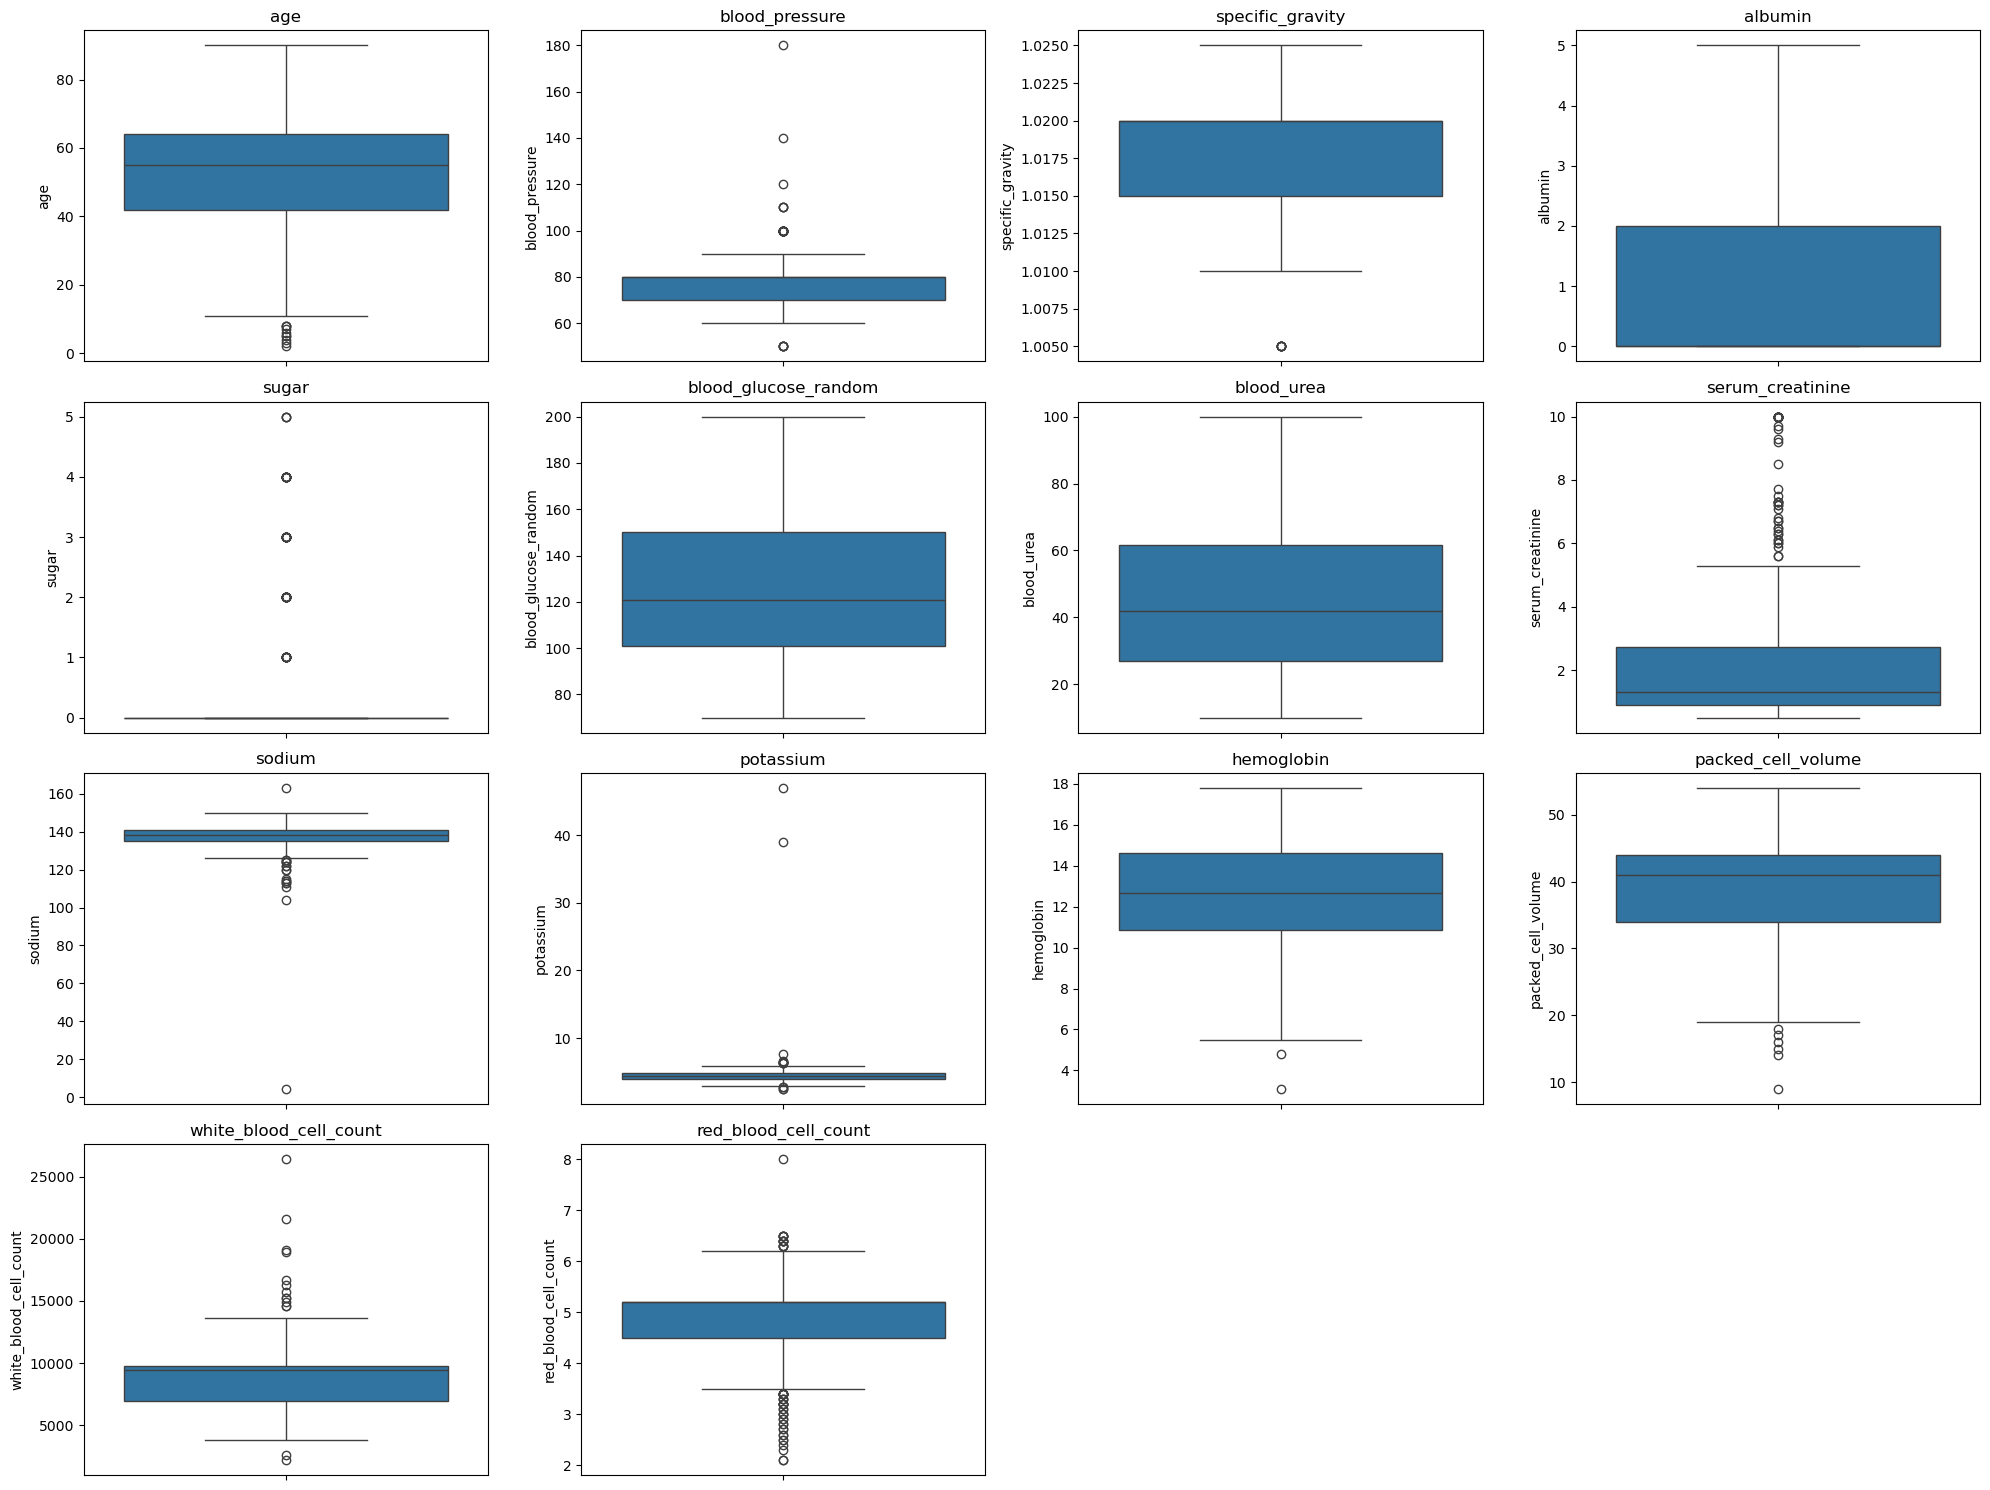

In [14]:
# Select numerical columns
numerical_cols = ckd_df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=ckd_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

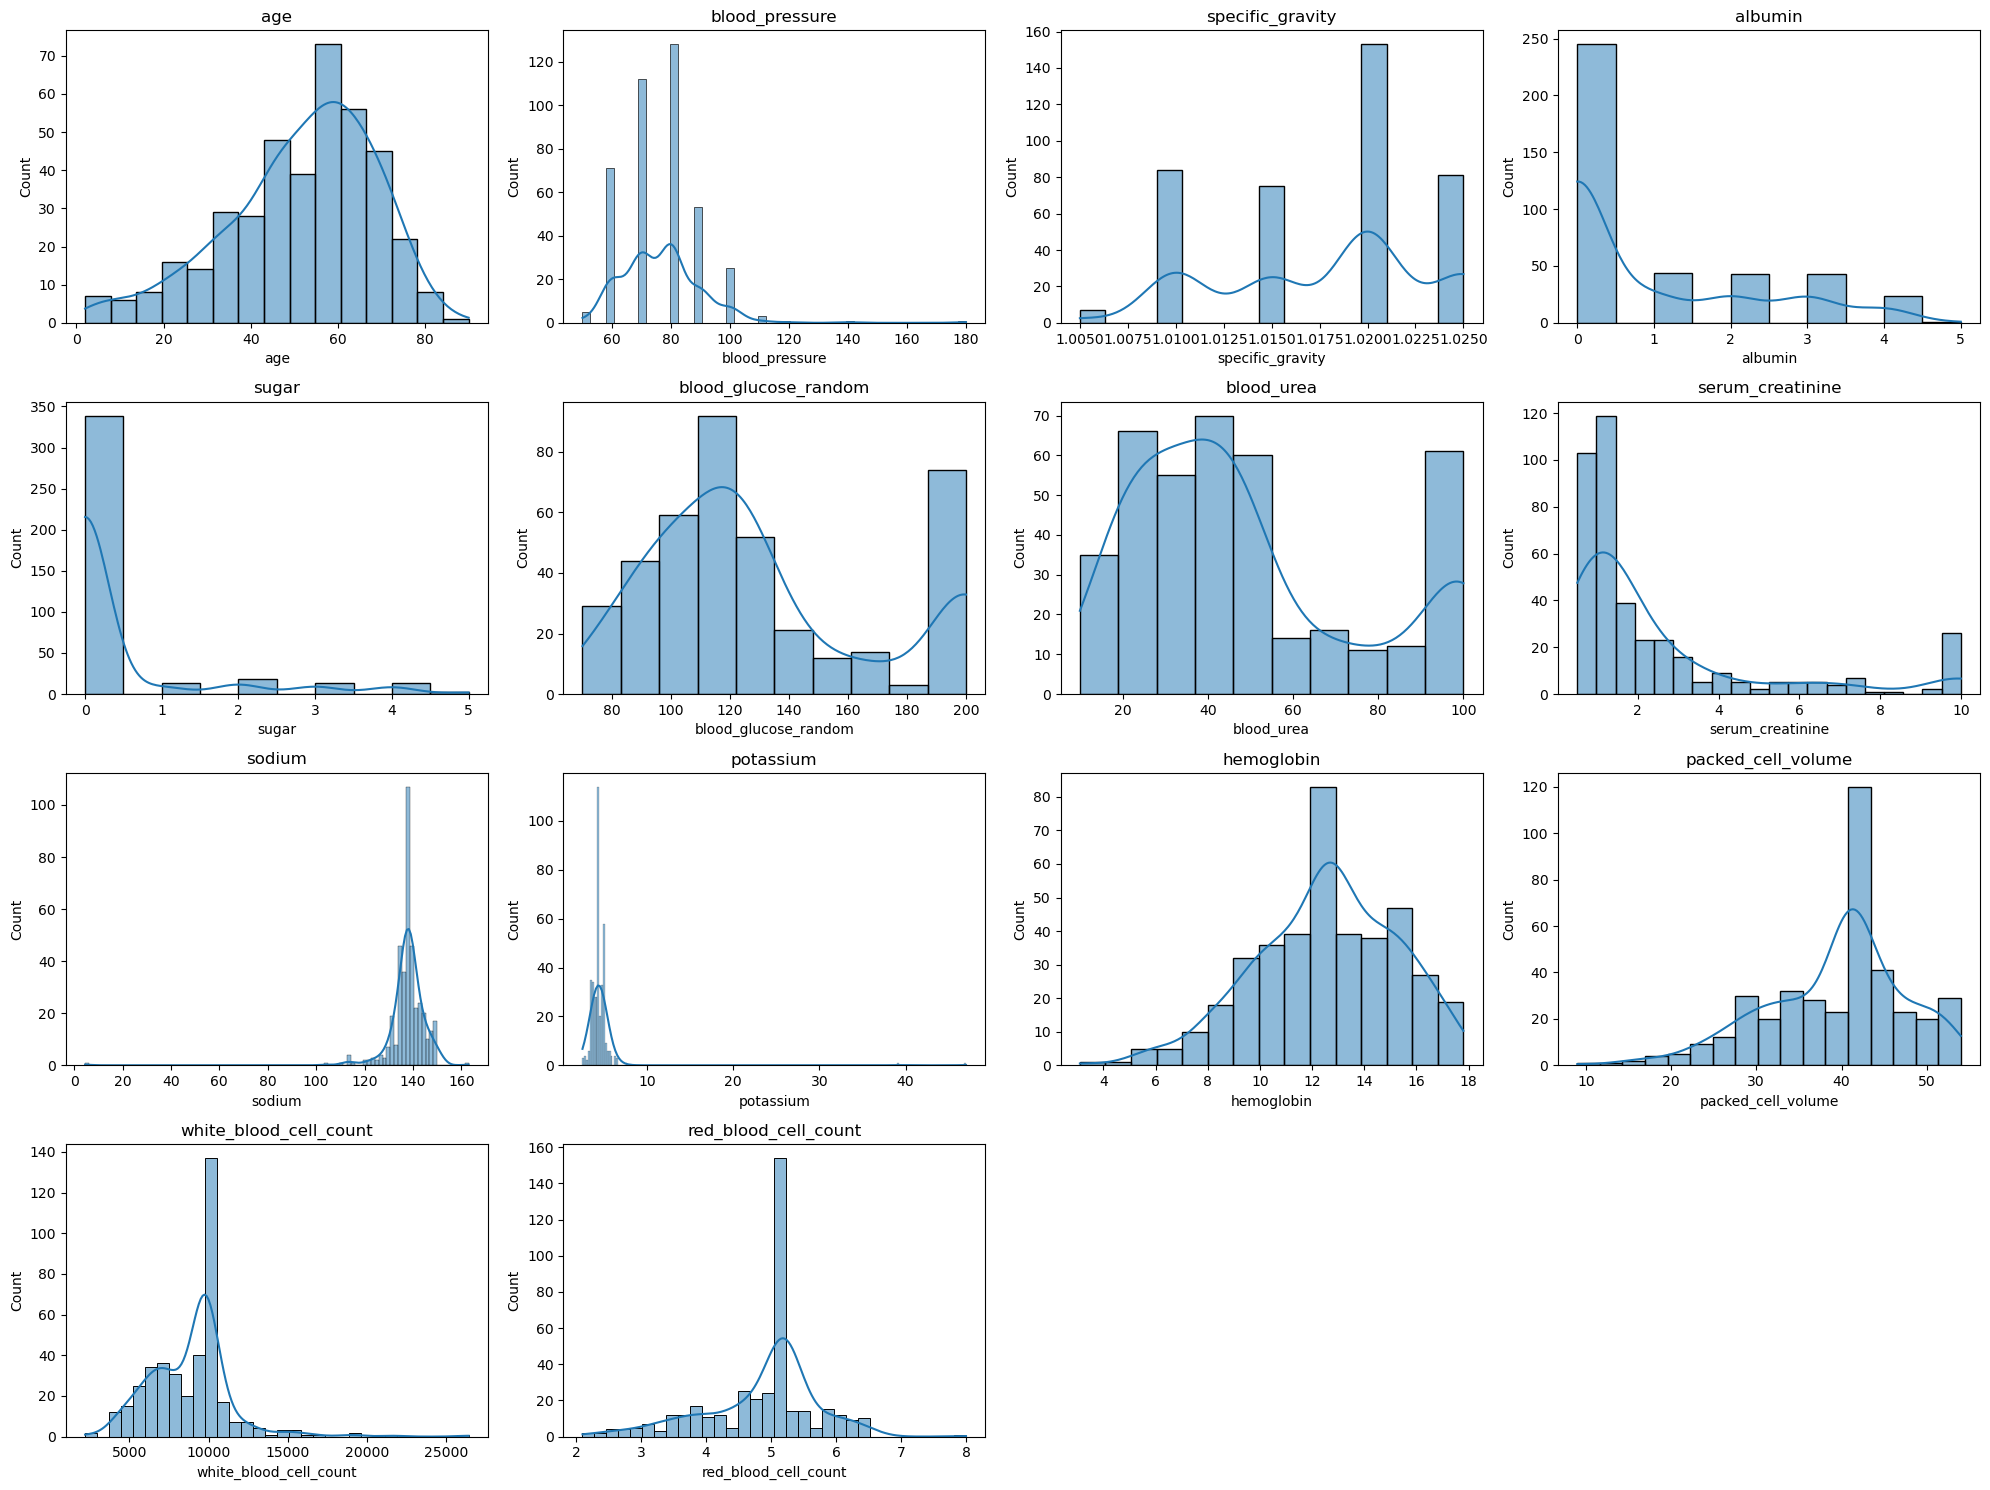

In [15]:
# Plot histograms for numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(ckd_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]  # Detect outliers
    return outliers

def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower_bound, upper_bound)  # Cap outliers

# Check for outliers in numerical columns
print("Outliers in Numerical Columns:")
for col in numerical_cols:
    outliers = detect_outliers(ckd_df[col])
    print(f"{col}: {len(outliers)} outliers")

# Cap outliers in numerical columns
ckd_df[numerical_cols] = ckd_df[numerical_cols].apply(cap_outliers)

# Verify that outliers have been capped
print("\nDataFrame after capping outliers:")
print(ckd_df[numerical_cols].describe())

Outliers in Numerical Columns:
age: 10 outliers
blood_pressure: 36 outliers
specific_gravity: 7 outliers
albumin: 0 outliers
sugar: 61 outliers
blood_glucose_random: 0 outliers
blood_urea: 0 outliers
serum_creatinine: 53 outliers
sodium: 18 outliers
potassium: 14 outliers
hemoglobin: 2 outliers
packed_cell_volume: 6 outliers
white_blood_cell_count: 14 outliers
red_blood_cell_count: 51 outliers

DataFrame after capping outliers:
              age  blood_pressure  specific_gravity    albumin  sugar  \
count  400.000000       400.00000        400.000000  400.00000  400.0   
mean    51.647500        75.82500          1.017756    0.90000    0.0   
std     16.756048        10.97134          0.005341    1.31313    0.0   
min      9.000000        55.00000          1.007500    0.00000    0.0   
25%     42.000000        70.00000          1.015000    0.00000    0.0   
50%     55.000000        80.00000          1.020000    0.00000    0.0   
75%     64.000000        80.00000          1.020000    2.

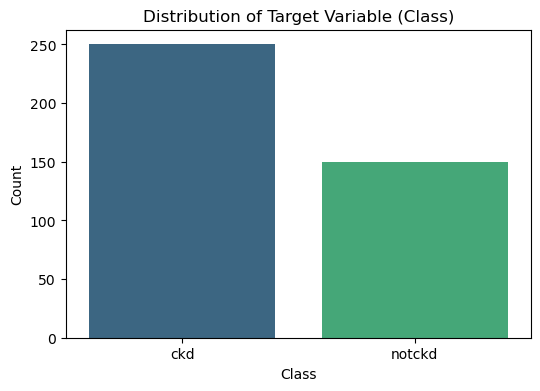

In [17]:
# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=ckd_df['class'], hue=ckd_df['class'], palette='viridis', legend=False)
plt.title("Distribution of Target Variable (Class)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

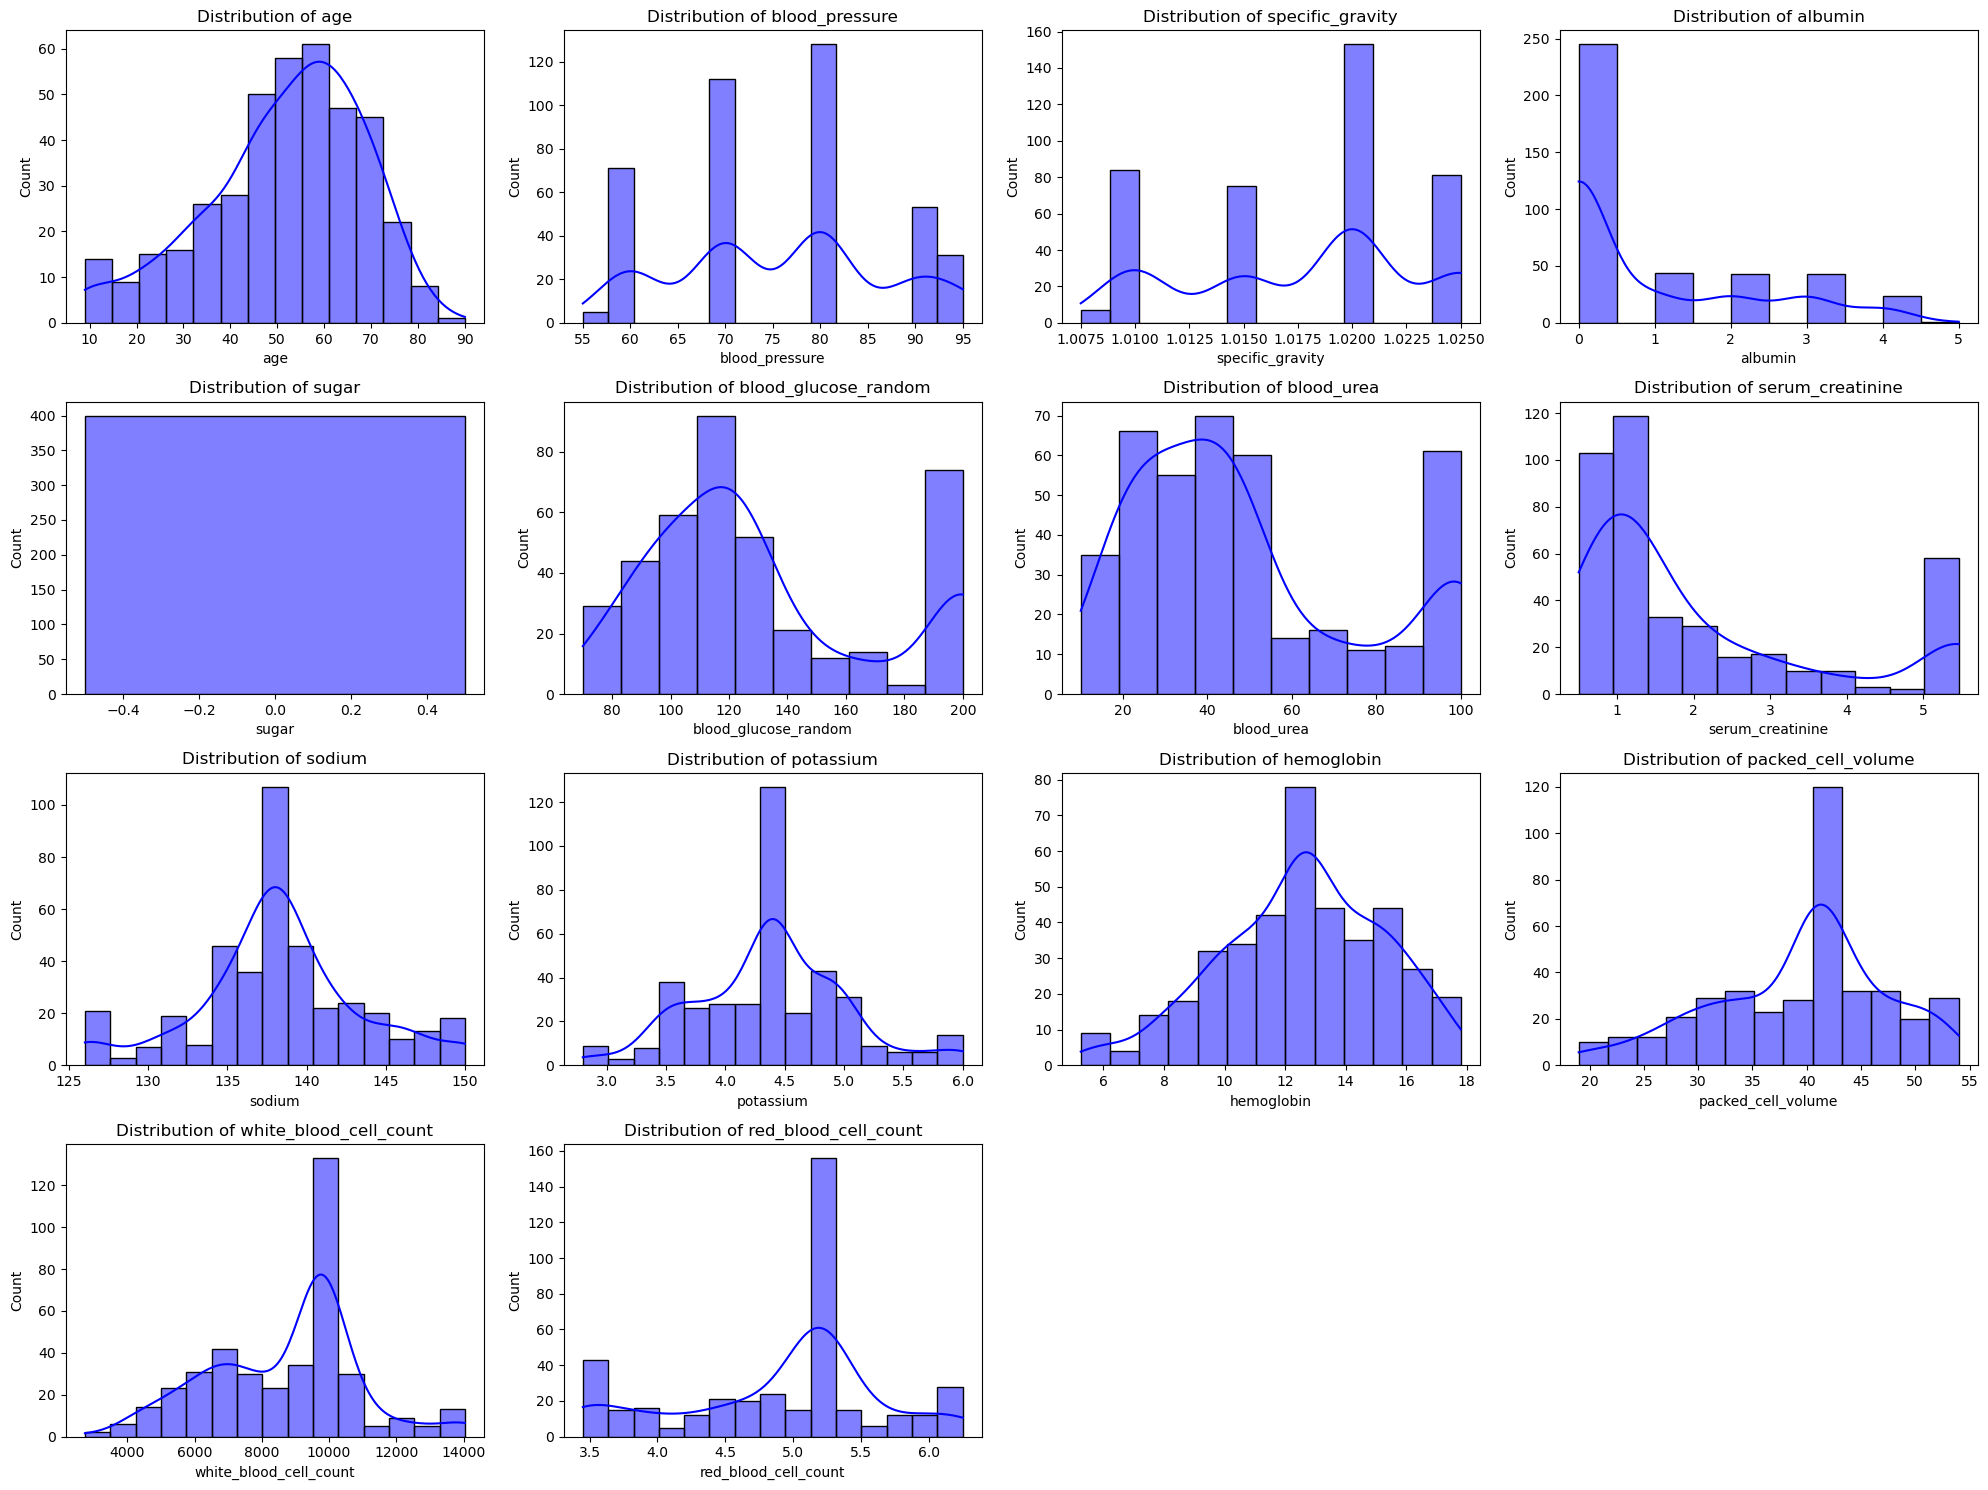

In [18]:

# Plot histograms for numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(ckd_df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

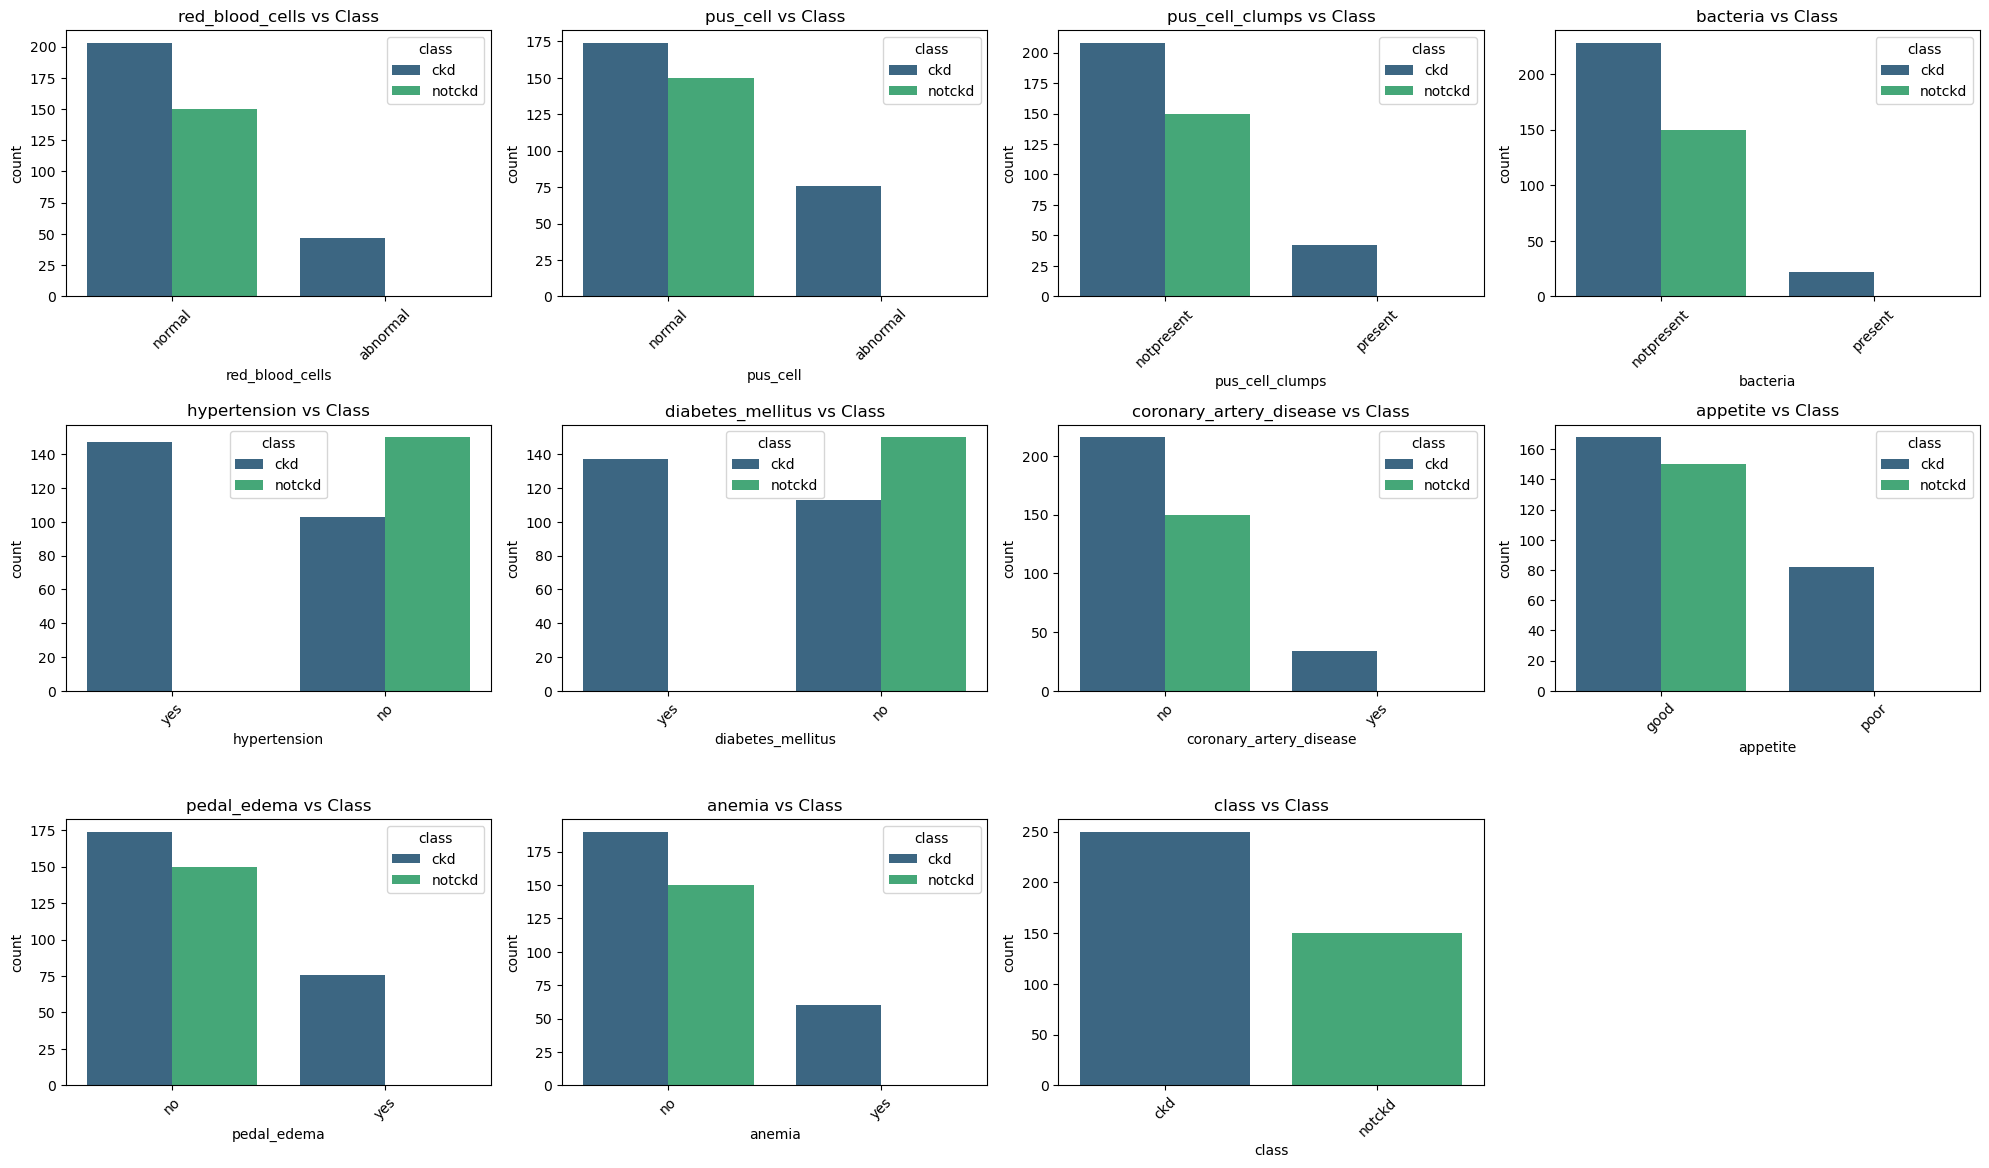

In [19]:
categorical_cols = ckd_df.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=ckd_df[col], hue=ckd_df['class'], palette='viridis')
    plt.title(f"{col} vs Class")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
ckd_df['class'] = ckd_df['class'].str.strip().str.lower().map({'ckd': 1, 'notckd': 0})

In [21]:
# Features (X) and Target (y)
X = ckd_df.drop(columns=['class'])  # Features
y = ckd_df['class']  # Target

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns (binary and multi-class)
categorical_cols = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 
                    'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 
                    'appetite', 'pedal_edema', 'anemia']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])  # Apply the same encoding to the test set


In [24]:
from sklearn.preprocessing import StandardScaler
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [25]:
from xgboost import XGBClassifier
import pandas as pd

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances from XGBoost model
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
# Sort features by importance
important_features = feature_importances.sort_values(ascending=False)  
print(important_features)

# Select the top N features
X_train_selected = X_train[important_features.index]
X_test_selected = X_test[important_features.index]



hemoglobin                 0.388955
specific_gravity           0.316029
albumin                    0.127574
hypertension               0.086297
serum_creatinine           0.029761
sodium                     0.024490
blood_glucose_random       0.011514
packed_cell_volume         0.008364
age                        0.003096
blood_urea                 0.002249
white_blood_cell_count     0.001003
potassium                  0.000668
bacteria                   0.000000
pus_cell_clumps            0.000000
blood_pressure             0.000000
pus_cell                   0.000000
red_blood_cells            0.000000
red_blood_cell_count       0.000000
sugar                      0.000000
diabetes_mellitus          0.000000
coronary_artery_disease    0.000000
appetite                   0.000000
pedal_edema                0.000000
anemia                     0.000000
dtype: float32


In [26]:
# Step 5: Remove less important features
features_to_remove = [
    'sugar', 'coronary_artery_disease', 'bacteria', 'anemia',
    'pus_cell', 'pus_cell_clumps', 'potassium',
    'white_blood_cell_count', 'appetite', 'pedal_edema', 'red_blood_cells'
]

# Drop the features
X_train_selected = X_train.drop(columns=features_to_remove)
X_test_selected = X_test.drop(columns=features_to_remove)


# Display the remaining features
print("\nRemaining Features:")
print(X_train_selected.columns)

# Filter feature importance for remaining features
important_features_selected = important_features.drop(features_to_remove)

# Convert to DataFrame for plotting
important_features_df = important_features_selected.reset_index()
important_features_df.columns = ['Feature', 'Importance']



Remaining Features:
Index(['age', 'blood_pressure', 'specific_gravity', 'albumin',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'hemoglobin', 'packed_cell_volume', 'red_blood_cell_count',
       'hypertension', 'diabetes_mellitus'],
      dtype='object')


In [27]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Define parameter grid for MLP

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01] 
}

# Set up Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create MLP model
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

# Set up GridSearchCV with Stratified K-Fold
mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV
mlp_grid_search.fit(X_train_selected, y_train)

# Get the best parameters and model
print("Best MLP Parameters:", mlp_grid_search.best_params_)
best_mlp_model = mlp_grid_search.best_estimator_

# Get predicted values and probabilities from the best model
y_pred = best_mlp_model.predict(X_test_selected)
y_probs = best_mlp_model.predict_proba(X_test_selected)[:, 1]  # For AUC

# Calculate accuracy and AUC
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)

print(f"MLP Accuracy: {accuracy}")
print(f"MLP AUC: {auc}")

# Cross-validation using the best model (without resampling)
# Using cross_val_score directly
cv_scores = cross_val_score(best_mlp_model, X_train_selected, y_train, cv=cv, scoring='roc_auc')

# Cross-validation AUC result
print(f"MLP Cross-Validation AUC: {np.mean(cv_scores):.3f}")

Best MLP Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
MLP Accuracy: 0.9875
MLP AUC: 1.0
MLP Cross-Validation AUC: 0.999


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



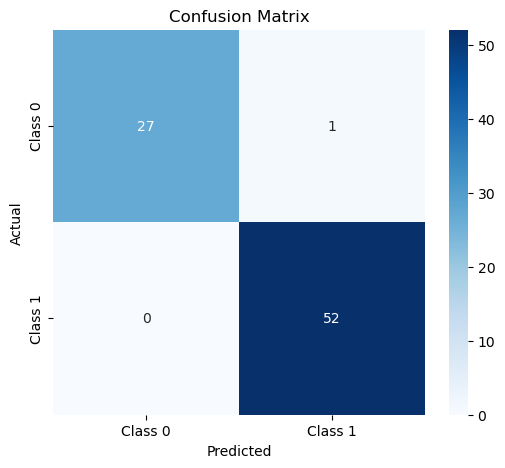

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# 1. Generate Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

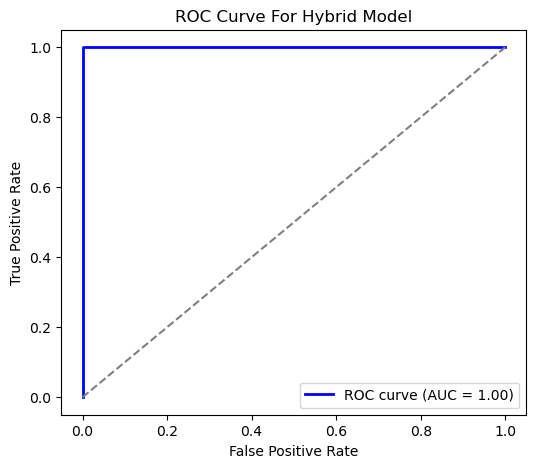

In [29]:
# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Hybrid Model')
plt.legend(loc='lower right')
plt.show()


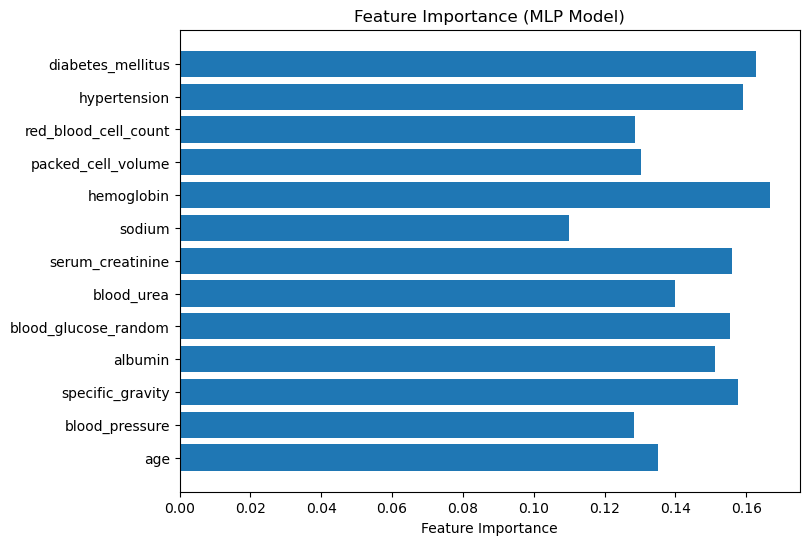

In [30]:
weights = best_mlp_model.coefs_[0]  # Weights of the first layer
feature_importance = np.abs(weights).mean(axis=1)  # Average absolute importance across all neurons

# Plot Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(range(X_train_selected.shape[1]), feature_importance, align='center')
plt.yticks(range(X_train_selected.shape[1]), X_train_selected.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (MLP Model)')
plt.show()


In [31]:
# After fitting the best MLP model (best_mlp_model), make predictions on the test set
y_pred = best_mlp_model.predict(X_test_selected)
y_probs = best_mlp_model.predict_proba(X_test_selected)[:, 1]  # For ROC AUC score

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)

print(f"MLP Accuracy on Test Set: {accuracy:.4f}")
print(f"MLP AUC on Test Set: {auc:.4f}")

# Cross-validation scores for the best model (without resampling)
cv_scores = cross_val_score(best_mlp_model, X_train_selected, y_train, cv=cv, scoring='roc_auc')
print(f"MLP Cross-Validation AUC: {np.mean(cv_scores):.4f}")


MLP Accuracy on Test Set: 0.9875
MLP AUC on Test Set: 1.0000
MLP Cross-Validation AUC: 0.9994


In [36]:
import pickle
import numpy as np
import pandas as pd

# Save the trained model to a file
with open("ckd_model.pkl", "wb") as file:
    pickle.dump(best_mlp_model, file)

# Load the trained model
with open('ckd_model.pkl', 'rb') as f:
    best_mlp_model = pickle.load(f)

# List of features that were trained in the model
feature_names = [
    'age', 'blood_pressure', 'specific_gravity', 'albumin', 'blood_glucose_random', 
    'blood_urea', 'serum_creatinine', 'sodium', 'hemoglobin', 'packed_cell_volume', 
    'red_blood_cell_count', 'hypertension', 'diabetes_mellitus'
]

# Function to simulate user input and model prediction
def user_input_and_prediction():
    # Collect user input for all features
    try:
        age = int(input("Enter age: "))  # Age input
        blood_pressure = int(input("Enter blood pressure (e.g., 120): "))  # Blood pressure
        specific_gravity = float(input("Enter specific gravity (e.g., 1.010): "))  # Specific gravity
        albumin = float(input("Enter albumin (e.g., 1.5): "))  # Albumin level
        blood_glucose_random = float(input("Enter blood glucose random (mg/dL): "))  # Random blood glucose
        blood_urea = float(input("Enter blood urea (mg/dL): "))  # Blood urea
        serum_creatinine = float(input("Enter serum creatinine (mg/dL): "))  # Serum creatinine
        sodium = float(input("Enter sodium (mmol/L): "))  # Sodium
        hemoglobin = float(input("Enter hemoglobin (g/dL): "))  # Hemoglobin level
        packed_cell_volume = float(input("Enter packed cell volume (e.g., 45.0): "))  # Packed cell volume
        red_blood_cell_count = float(input("Enter red blood cell count (million cells/mL): "))  # RBC count
        hypertension = int(input("Do you have hypertension? (1 for Yes, 0 for No): "))  # Hypertension
        diabetes_mellitus = int(input("Do you have diabetes mellitus? (1 for Yes, 0 for No): "))  # Diabetes

        # Combine all the inputs into a pandas DataFrame for model prediction
        user_input = pd.DataFrame([[age, blood_pressure, specific_gravity, albumin, blood_glucose_random,
                                    blood_urea, serum_creatinine, sodium, hemoglobin, packed_cell_volume,
                                    red_blood_cell_count, hypertension, diabetes_mellitus]], columns=feature_names)

        # Predict CKD (0 or 1)
        ckd_prediction = best_mlp_model.predict(user_input)

        # Output results based on CKD prediction
        if ckd_prediction == 1:
            print("CKD detected!")
        else:
            print("No CKD detected.")
    
    except ValueError:
        print("Invalid input, please enter numerical values correctly.")

# Call the function to test the input and prediction
user_input_and_prediction()


Enter age:  35
Enter blood pressure (e.g., 120):  120
Enter specific gravity (e.g., 1.010):  1.050
Enter albumin (e.g., 1.5):  1.2
Enter blood glucose random (mg/dL):  120
Enter blood urea (mg/dL):  15
Enter serum creatinine (mg/dL):  1
Enter sodium (mmol/L):  135
Enter hemoglobin (g/dL):  120
Enter packed cell volume (e.g., 45.0):  55
Enter red blood cell count (million cells/mL):  6
Do you have hypertension? (1 for Yes, 0 for No):  0
Do you have diabetes mellitus? (1 for Yes, 0 for No):  0


No CKD detected.


In [38]:
import sklearn
print(sklearn.__version__)


1.6.1
